## Machine Learning - final project


Submitted by: [Osnat Haj Yahia]


In [94]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import multivariate_normal

## Gaussian naive-Bayes classifier

In this project you will implement a new classification algorithm, known as the Gaussian naive-Bayes classifier.

In the basis of the naive-Bayes algorithm, it is assumed that the **features** of the data are independent, given the class labels. In particular, in the **Gaussian** naive-Bayes case, the features are assumed to follow a Gaussian distribution:

$$ p(\vec{x_{}}|y=c)=\mathcal{N}(x\ |\ \mu_c,\Sigma_c) $$

and since the features in each class are independent (the model's assumption) then each covariance matrix $\Sigma_c$ takes a **diagonal** form:

$$
\mu_c=
\begin{pmatrix}
\mu_{c,1}\\
\mu_{c,2}\\
\vdots\\
\mu_{c,d}\\
\end{pmatrix}
\ \ \ \ \ \ 
\Sigma_c=
\begin{pmatrix}
\sigma^2_{c,1}\\
 & \sigma^2_{c,2}\\
 &  & \ddots\\
 &  &  & \sigma^2_{c,d}
\end{pmatrix}
\ \ \ \ \ 
c=1,..,k
$$

where $\mu_{c,j}$ is the mean of feature $j$ in class $c$, and
$\sigma^2_{c,j}$ is the variance of feature $j$ in class $c$.

Given a labeled training dataset of $n$ examples: $\{(\vec{x_i},y_i)\}_{i=1}^n$ the algorithm estimates the model parameters $\mu_c$ and $\Sigma_c$ for each and every $c\in\{1,2,...,k\}$. 
(note: This is very similar to the M-step in GMM or k-means algorithms, as the classes assignments are known.)

Then, given a new (unlabelled) example $x$, the classifier prediction is given by:

$$ \hat{y_{}}(x)=\arg \max_c \mathcal{N}(x\ |\ \mu_c,\Sigma_c)\ \ \in\{1,...,k\} $$

Finally, to evaluate the algorithm performance, we will calculate the **accuracy** score, which is the fraction of examples that were labelled correctly by the algorithm (so accuracy of 1 is the best, and 0 is the worst).

Implement the following functions:

1. ```GNB_fit``` function that takes the labeled training dataset (```X``` and ```y```), and returns the GNB parameters:
$\{(\mu_c,\Sigma_c)\}_{c=1}^k$

2. ```GNB_predict``` function that given the GNB parameters and a set of unlabelled examples $X_{test}$ returns a prediction vector ```y_hat``` (with one prediction for each of the examples).

3. ```GNB_score``` function that given the predictions ```y_hat``` and the true labels ```y``` calculates the accuracy score.

Add comments to make your code easy to follow and debug.

Bonus: Try to avoid looping over *examples* or *features* in your code.


In [95]:
# your code here.. 

import numpy as np
import math

class GausianNaiveBayes(object):
    def GNB_fit(self, X, y):
        self.X = X
        self.y = y
        self.existed_classes = np.unique(y)
        self.param = []
        # Calc the mean and variance for each feature for each class
        for i, c in enumerate(self.existed_classes):           
            lable_equal_to_class_c = X[np.where(y == c)] 
            self.param.append([])
            for j in range(X.shape[1]): 
                col = lable_equal_to_class_c[:, j]
                params = {"mean": col.mean(), "var": col.var()}
                self.param[i].append(params)

    def _calc_likelihood(self, mean, var, x):
        # p(x/y) = 1/sqrt(2 * pi* var^2) exponent (-1/2(x-mean)^2 / var^2)
        eps = 1e-4
        part_one_of_the_likelihood_equation = 1.0 / math.sqrt(2.0 * math.pi * var + eps)
        exponent_part_2_of_the_equation = math.exp(-(math.pow(x - mean, 2) / (2 * var + eps)))
        return part_one_of_the_likelihood_equation * exponent_part_2_of_the_equation

    def _calculate_prior(self, c):
        lable_equal_to_class_c = self.X[np.where(self.y == c)]
        number_of_specific_class_c = lable_equal_to_class_c.shape[0]
        number_of_total_classes = self.X.shape[0]
        return number_of_specific_class_c / number_of_total_classes

    def _classify(self, sample):
        """  Calc Bayes Rule P(Y|X) = P(X|Y)*P(Y)/P(X)"""
        posteriors = []
        for i, c in enumerate(self.existed_classes):
            posterior = self._calculate_prior(c)
            # P(x1,x2,x3|Y) = P(x1|Y)*P(x2|Y)*P(x3|Y)
            # Multiply with the class likelihoods
            for j, params in enumerate(self.param[i]):
                sample_feature = sample[j]
                # calc P(x|Y)
                likelihood = self._calc_likelihood(params["mean"], params["var"], sample_feature)
                # Multiply with the accumulated probability
                posterior *= likelihood
            # Total = P(Y)*P(x1|Y)*P(x2|Y)*...*P(xN|Y)
            posteriors.append(posterior)
        index_of_max = np.argmax(posteriors)
        return self.existed_classes[index_of_max]

    def GNB_predict(self, X):
        y_pred = []
        for sample in X:
            y = self._classify(sample)
            y_pred.append(y)
        return y_pred

### Test case I: The breast cancer dataset 

The Wisconsin breast cancer dataset consists of $n=569$ samples, each consists of 30 features describing physical properties of the tumor. Each sample is binary labelled as 'malignant' (y=0) or 'benign' (y=1). 


30
(569, 30)
[0 1]


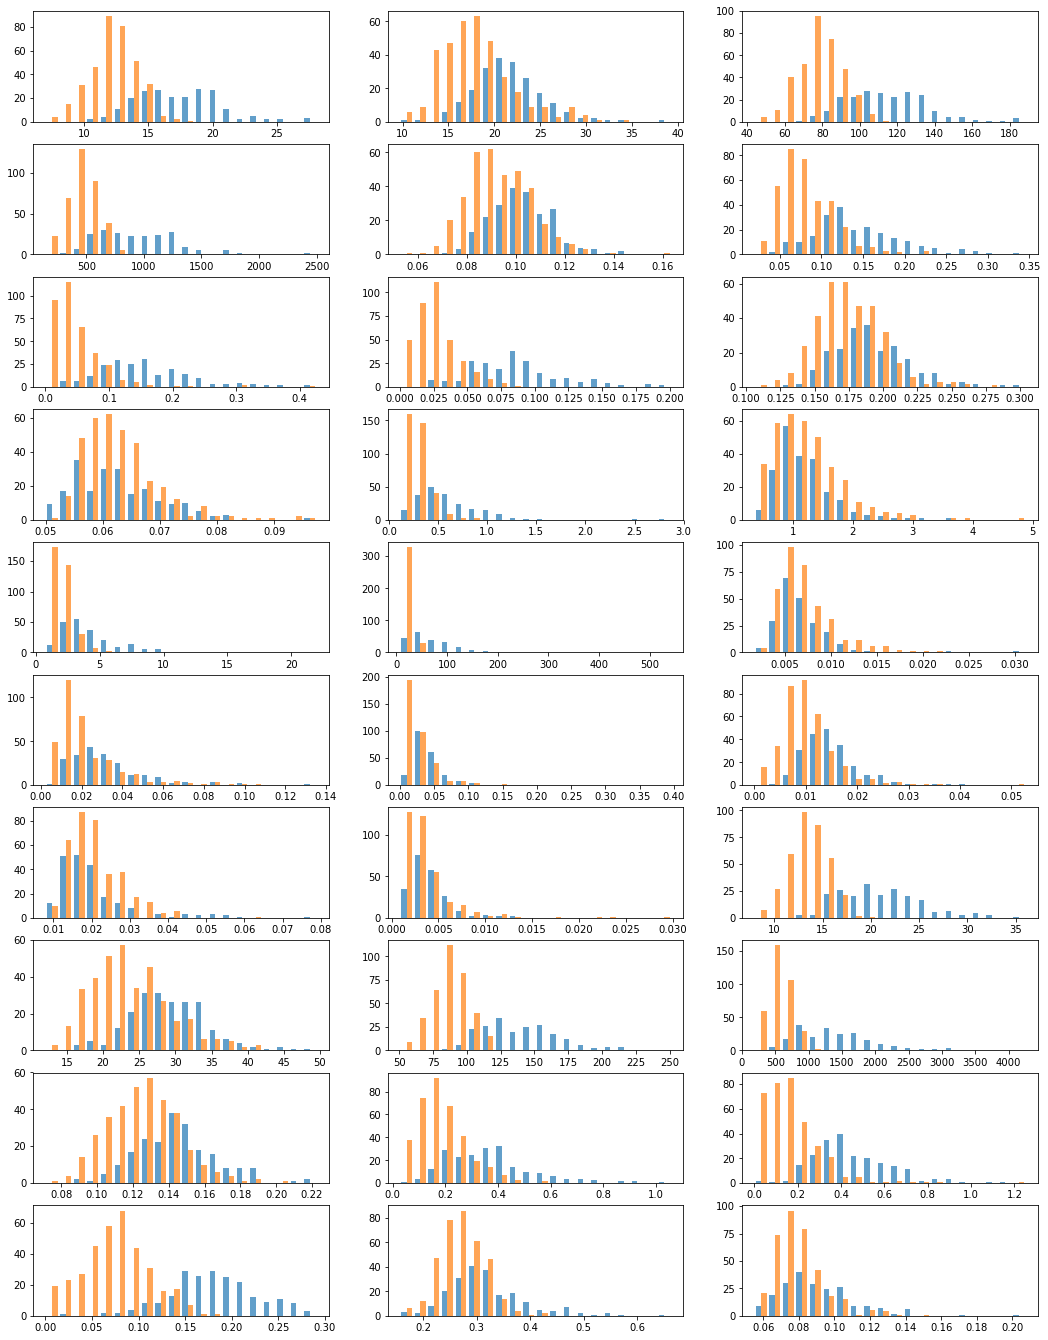

In [96]:
# your code here.. 

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

y = data.target
X = data.data
print(X.shape[1])

print(X.shape)
n,d = X.shape
print(np.unique(y))

plt.figure(figsize=(18,24))
for i in range(d):
    plt.subplot(10,3,i+1)
    plt.hist([X[y==0,i],X[y==1,i]],20,alpha=0.7);

- Fit a Gaussian naive-Bayes model to 70% of the data, and test the model on the rest (30%) of it. 

(You should get an accuracy of more than 90%...)

In [99]:
# your code here..

def split_the_data(X, y, test_size=0.5, shuffle=True):
    if shuffle:
        X, y = shuffle_data(X, y)
    split_i = len(y) - int(len(y) // (1 / test_size))
    X_train, X_test = X[:split_i], X[split_i:]
    y_train, y_test = y[:split_i], y[split_i:]
    return X_train, X_test, y_train, y_test

def shuffle_data(X, y):
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    return X[idx], y[idx]

def GNB_score(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred, axis=0) / len(y_true)
    return accuracy
 
    
X_train, X_test, y_train, y_test = split_the_data(X, y, test_size=0.3)
clf = GausianNaiveBayes()
clf.GNB_fit(X_train, y_train)
y_pred = clf.GNB_predict(X_test)

accuracy = GNB_score(y_test, y_pred)
print ("The Gausian Naive Base accuracy is:", accuracy)

The Gausian Naive Base accuracy is: 0.947058823529


### Test case II: The Olivetti faces dataset 

This dataset consists of 400 faces images (64x64 pixels each) of 40 different people (10 images of each person). 

Note, that the number of features here (d=64x64=4096) is much higher than the number of examples (n=400). In order to avoid significant overfitting of the model, we will try to reduce the number of features (using PCA) before we fit the classifier. 




[[ 0.30991736  0.36776859  0.41735536 ...,  0.15289256  0.16115703
   0.1570248 ]
 [ 0.45454547  0.47107437  0.51239669 ...,  0.15289256  0.15289256
   0.15289256]
 [ 0.31818181  0.40082645  0.49173555 ...,  0.14049587  0.14876033
   0.15289256]
 ..., 
 [ 0.5         0.53305787  0.60743803 ...,  0.17768595  0.14876033
   0.19008264]
 [ 0.21487603  0.21900827  0.21900827 ...,  0.57438016  0.59090906
   0.60330576]
 [ 0.5165289   0.46280992  0.28099173 ...,  0.35950413  0.35537189
   0.38429752]]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
(400, 4096)


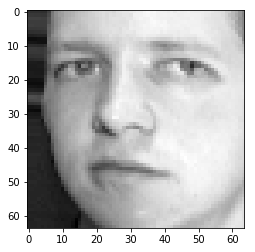

In [100]:
from scipy.io import loadmat
from sklearn import datasets

data = loadmat('faces.mat')
y = data['target']
X = data['data']

faces = datasets.fetch_olivetti_faces()
y = faces.target
X = faces.data

print(X)

print(np.unique(y))

print(X.shape)
n,d = X.shape

plt.imshow(X[3,:].reshape(64,64),interpolation='nearest',cmap='gray')
plt.show()

#### Part A: PCA

Implement a PCA function that for a given dataset matrix ```X``` (of size $n\times d$) returns a matrix ```U``` containing all the principal vectors in a descending order. 

Note: the function should check whether $n>d$ or $n<d$, and proceed accordingly,

in case that $n>d$:
$$ \begin{align}
X&=X-\bar{X_{}}\\
C&=X^T X \ \ \ (d\times d)\\ 
Cu&=\lambda u
\end{align} $$


in case that $n<d$:
$$ \begin{align}
X&=X-\bar{X_{}}\\
\tilde{C_{}}&=XX^T \ \ \ (n\times n)\\
\tilde{C_{}}v&=\lambda v \\
u&=X^T v \\
u&=\frac{u}{\Vert u \Vert}
\end{align} $$

- Plot the first 6 principal vectors of the faces data (a.k.a 'eigen-faces') 



In [101]:
# your code here.. 

def my_PCA(X, n_components):
    covariance_matrix = calc_covariance_matrix(X)
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    index = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[index][:n_components]
    eigenvectors = np.atleast_1d(eigenvectors[:, index])[:, :n_components]
    X_transformed = X.dot(eigenvectors)

    return X_transformed
    
def calc_covariance_matrix(X, Y=None):
    if Y is None:
        Y = X
    n_samples = np.shape(X)[0]
    covariance_matrix = (1 / (n_samples-1)) * (X - X.mean(axis=0)).T.dot(Y - Y.mean(axis=0))

    return np.array(covariance_matrix, dtype=float)

def calc_correlation_matrix(X, Y=None):
    if Y is None:
        Y = X
    n_samples = np.shape(X)[0]
    covariance = (1 / n_samples) * (X - X.mean(0)).T.dot(Y - Y.mean(0))
    std_dev_X = np.expand_dims(calc_std_dev(X), 1)
    std_dev_y = np.expand_dims(calc_std_dev(Y), 1)
    correlation_matrix = np.divide(covariance, std_dev_X.dot(std_dev_y.T))

    return np.array(correlation_matrix, dtype=float)


def calc_std_dev(X):
    std_dev = np.sqrt(calc_variance(X))
    return std_dev


def calc_variance(X):
    mean = np.ones(np.shape(X)) * X.mean(0)
    n_samples = np.shape(X)[0]
    variance = (1 / n_samples) * np.diag((X - mean).T.dot(X - mean))
    return variance

#### Part B: Classification

Fit a Gaussian naive-Bayes model to the data, after reducing it to $K=1,2,...,200$ dimensions using PCA.

- Use 5-fold cross-validation to estimate the accuracy score on the training-set and on the validation-set, for each value of $K$. Plot both score curves as a function of $K$. 

- Choose the best value for $K$, and run the algorithm on 70% of the data. Use the rest of the data for validation, and plot a $40\times 40$ confusion matrix (see Ex.4).

In [102]:
# your code here.. 

from sklearn.model_selection import KFold
k_vs_accuracy_score = {}
for k in range(154,200):
    x_transform = my_PCA(X, k)
    k_fold = KFold(n_splits=5,shuffle=True)
    for train_index, test_index in k_fold.split(x_transform):
        X_train, X_test = x_transform[train_index], x_transform[test_index]
        y_train, y_test = y[train_index], y[test_index]  
    clf = GausianNaiveBayes()
    clf.GNB_fit(X_train, y_train)
    y_pred = clf.GNB_predict(X_test)
    accuracy = GNB_score(y_test, y_pred)
    print("K ="+ str(k) + "  accuracy:" + str(accuracy))
    k_vs_accuracy_score[k] = accuracy
    
max_accuracy = max(k_vs_accuracy_score.values())       
for k, v in k_vs_accuracy_score.items():
    if k_vs_accuracy_score[k] == max_accuracy:
        best_k = k
        
print("The best k is :" + str(best_k)+"  with max accuracy is :" + str(max_accuracy))

x_transform = my_PCA(X, best_k)
X_train, X_test, y_train, y_test = split_the_data(x_transform, y, test_size=0.3)
clf = GausianNaiveBayes()
clf.GNB_fit(X_train, y_train)
y_pred = clf.GNB_predict(X_test)

accuracy = GNB_score(y_test, y_pred)
print ("The Gausian Naive Base accuracy is:", accuracy)

C:\Users\osnath\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


K =154  accuracy:0.0
K =155  accuracy:0.025
K =156  accuracy:0.0375
K =157  accuracy:0.025
K =158  accuracy:0.05
K =159  accuracy:0.0375
K =160  accuracy:0.025
K =161  accuracy:0.025
K =162  accuracy:0.0375
K =163  accuracy:0.0375
K =164  accuracy:0.0125
K =165  accuracy:0.0
K =166  accuracy:0.05
K =167  accuracy:0.0625
K =168  accuracy:0.025
K =169  accuracy:0.0375
K =170  accuracy:0.025
K =171  accuracy:0.0375
K =172  accuracy:0.0375
K =173  accuracy:0.0125
K =174  accuracy:0.025
K =175  accuracy:0.05
K =176  accuracy:0.0375
K =177  accuracy:0.0
K =178  accuracy:0.0375
K =179  accuracy:0.05
K =180  accuracy:0.0375
K =181  accuracy:0.0125
K =182  accuracy:0.025
K =183  accuracy:0.0
K =184  accuracy:0.025
K =185  accuracy:0.0375
K =186  accuracy:0.025
K =187  accuracy:0.0
K =188  accuracy:0.0375
K =189  accuracy:0.0
K =190  accuracy:0.025
K =191  accuracy:0.025
K =192  accuracy:0.025
K =193  accuracy:0.0
K =194  accuracy:0.025
K =195  accuracy:0.025
K =196  accuracy:0.05
K =197  accura

## Good luck !